<a href="https://colab.research.google.com/github/sayu0303/Otimiza-Nao-Linear/blob/main/METODO_ED_(TESTE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#errado
'''
BLOCO PARA DECLARAÇÃO DE DADOS E DAS VARIÁVEIS A SEREM UTILIZADAS DURANTE A
EXECUÇÃO DO PROGRAMA

'''

#Definição das bibliotecas a serem utilizadas

import pandas as pd #Leitura da minha planilha
import numpy as np #Operações matemáticas
import matplotlib.pyplot as plt #Geração de gráficos
from scipy.integrate import solve_ivp #Integração numérica
from scipy.optimize import differential_evolution #Otimização não



def edo (t, T, par):
  h,qg=par

  dTdt = (par[1]/(p*c)) - (((par[0]*A)*(T-Tam))/(p*c*V))

  return dTdt

#URL da planilha no Github

url = 'https://github.com/sayu0303/Otimiza-Nao-Linear/raw/refs/heads/main/problema6_lumped(corrigido).xlsx'

#Leitura da planilha

df_dados = pd.read_excel(url, header = 0) #Meu header é onde inicia-se a leitura da minha planilha


'''
#TESTE DE EXCUÇÃO DO PANDAS PARA A OBTENÇÃO DOS DADOS DA PLANILHA

print(df_dados)

print(df_dados.columns)
'''


#Definição dos dados da planilha para utilização do código

t_exp = df_dados['t_s'].to_numpy() #Considera os valores da minha coluna t_s da planilha fornecida
tempo = t_exp.astype(float)
N = len(tempo)
T_exp = df_dados['T_C'].to_numpy() #Considera os valores da minha coluna T_C da planilha fornecida

#Definição das variáveis a serem utilizadas

V = 2.5e-4 #Volume (m3)
A = 0.045 #Área de troca térmica (m2)
T0 = [120] #Temperatura inicial (°C)
Tam = 25 #Temperatura ambiente constante (°C)
p = 7800 #Densidade (kg/m3)
c = 460 #Calor específico (J/kg.K)
tol = 1e-8 #Tolerância

#Chute inicial

h = 25
qg = 1.5e5

#Definição da função lumped a ser utilizada

par = [h, qg]

tspan = [float(tempo[0]), float(tempo[N-1])]

modelo= lambda t,T:edo (t, T, par)

sol=solve_ivp(modelo,tspan,T0, method='BDF',t_eval=tempo)

T=sol.y

def FOBJ(par,tempo,T_exp)








SyntaxError: expected ':' (ipython-input-3947681787.py, line 76)

2981.0295880231884
4452.132196823414
Otimização finalizada:
  h*  = 2981.03
  qg* = 4452.13
  SSE = 340.263


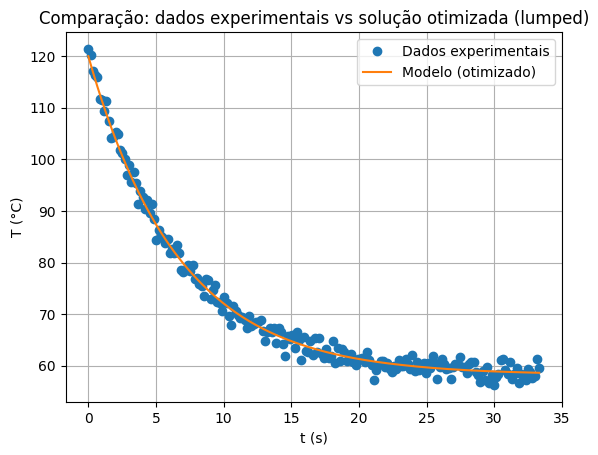

In [2]:
#MEU CODIGO CORRIGIDO

'''
BLOCO PARA DECLARAÇÃO DE DADOS E DAS VARIÁVEIS A SEREM UTILIZADAS DURANTE A
EXECUÇÃO DO PROGRAMA

'''

#Definição das bibliotecas a serem utilizadas

import pandas as pd #Leitura da minha planilha
import numpy as np #Operações matemáticas
import matplotlib.pyplot as plt #Geração de gráficos
from scipy.integrate import solve_ivp #Integração numérica
from scipy.optimize import differential_evolution #Otimização não



def edo (t, T, par):

      #Definição das variáveis a serem utilizadas

  V = 2.5e-4 #Volume (m3)
  A = 0.045 #Área de troca térmica (m2)
  Tam = 25 #Temperatura ambiente constante (°C)
  p = 7800 #Densidade (kg/m3)
  c = 460 #Calor específico (J/kg.K)

  h , qg = par
  dTdt = (qg/(p*c*V)) - ((h*A)*(T-Tam))/(p*c*V)

  return dTdt

def solucao(par,tempo):

  T0 = [120] #Temperatura inicial (°C)
  tspan = [float(tempo[0]), float(tempo[N-1])]

  modelo= lambda t,T:edo (t, T, par)

  sol=solve_ivp(modelo,tspan,T0, method='RK45',t_eval=tempo)

  T=sol.y
  return T

def FOBJ(par,tempo,T_exp):

  T = solucao(par,tempo)

  erro = (T_exp - T)**2
  S=np.sum(erro)
  return(S)

#URL da planilha no Github

url = 'https://github.com/sayu0303/Otimiza-Nao-Linear/raw/refs/heads/main/problema6_lumped(corrigido).xlsx'

#Leitura da planilha

df_dados = pd.read_excel(url, header = 0) #Meu header é onde inicia-se a leitura da minha planilha


'''
#TESTE DE EXCUÇÃO DO PANDAS PARA A OBTENÇÃO DOS DADOS DA PLANILHA

print(df_dados)

print(df_dados.columns)
'''


#Definição dos dados da planilha para utilização do código

t_exp = df_dados['t_s'].to_numpy() #Considera os valores da minha coluna t_s da planilha fornecida
tempo = t_exp.astype(float)
N = len(tempo)
T_exp = df_dados['T_C'].to_numpy() #Considera os valores da minha coluna T_C da planilha fornecida

#Chute inicial

h = 50
qg = 1.0e5

#Definição da função lumped a ser utilizada
par = [h, qg]

Resul=FOBJ(par,tempo,T_exp)

bounds = [(20, 4000), (0, 5000)]  # (h, qg)

obj = lambda par: FOBJ(par, tempo, T_exp)
ret = differential_evolution(obj, bounds)
h_opt, qg_opt = ret.x
print(h_opt)
print(qg_opt)
print("Otimização finalizada:")
print(f"  h*  = {h_opt:.6g}")
print(f"  qg* = {qg_opt:.6g}")
print(f"  SSE = {ret.fun:.6g}")
# -----------------------------
# Solução otimizada e gráfico
# -----------------------------
par = [float(h_opt),  float(qg_opt)]

T_opt = solucao(par, tempo)

plt.figure()
plt.plot(tempo, T_exp, "o", label="Dados experimentais")
plt.plot(tempo, T_opt.T, "-", label="Modelo (otimizado)")
plt.xlabel("t (s)")
plt.ylabel("T (°C)")
plt.title("Comparação: dados experimentais vs solução otimizada (lumped)")
plt.grid(True)
plt.legend()
plt.show()

Otimização finalizada:
  h*  = 2980.99
  qg* = 4452.05
  SSE = 340.263


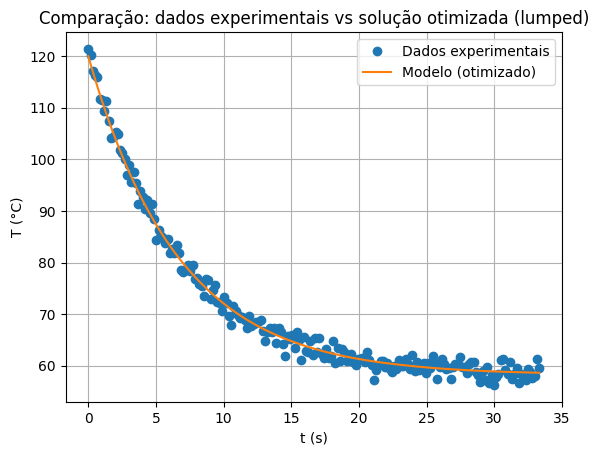

In [3]:


#CHAT


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import differential_evolution

# -----------------------------
# Modelo (EDO) e solução
# -----------------------------
def edo(t, T, par, V, A, Tam, p, c):
    h, qg = par
    dTdt = (qg/(p*c*V)) - ((h*A)*(T-Tam))/(p*c*V)
    return dTdt

def solucao(par, tempo):
    # Constantes do problema
    V = 2.5e-4   # m^3
    A = 0.045    # m^2
    T0 = [120.0] # °C
    Tam = 25.0   # °C
    p = 7800.0   # kg/m^3
    c = 460.0    # J/kg.K

    tspan = [float(tempo[0]), float(tempo[-1])]
    modelo = lambda t, T: edo(t, T, par, V, A, Tam, p, c)

    sol = solve_ivp(modelo, tspan, T0, method="RK45", t_eval=tempo)

    # Retorna como vetor 1D
    return sol.y[0]

def FOBJ(par, tempo, T_exp):
    T_mod = solucao(par, tempo)
    return np.sum((T_exp - T_mod) ** 2)

# -----------------------------
# Leitura dos dados
# -----------------------------
url = "https://github.com/sayu0303/Otimiza-Nao-Linear/raw/refs/heads/main/problema6_lumped(corrigido).xlsx"
df_dados = pd.read_excel(url, header=0)

tempo = df_dados["t_s"].to_numpy(dtype=float)
T_exp = df_dados["T_C"].to_numpy(dtype=float)

# -----------------------------
# Otimização
# -----------------------------
bounds = [(0, 4000), (0, 1e7)]  # (h, qg)

ret = differential_evolution(
    FOBJ,
    bounds,
    args=(tempo, T_exp),
    seed=123,     # reprodutibilidade
    polish=True
)

h_opt, qg_opt = ret.x
print("Otimização finalizada:")
print(f"  h*  = {h_opt:.6g}")
print(f"  qg* = {qg_opt:.6g}")
print(f"  SSE = {ret.fun:.6g}")

# -----------------------------
# Solução otimizada e gráfico
# -----------------------------
T_opt = solucao([h_opt, qg_opt], tempo)

plt.figure()
plt.plot(tempo, T_exp, "o", label="Dados experimentais")
plt.plot(tempo, T_opt, "-", label="Modelo (otimizado)")
plt.xlabel("t (s)")
plt.ylabel("T (°C)")
plt.title("Comparação: dados experimentais vs solução otimizada (lumped)")
plt.grid(True)
plt.legend()
plt.show()
